# Statistics: California

Let's consider FCC broadband data for California

### Column Descriptions

| Column Name                     | Meaning                                                                 |
|---------------------------------|-------------------------------------------------------------------------|
| `area_data_type`                | Type of data or classification for the area.                            |
| `geography_type`                | Type of geographic area (e.g., city, county).                           |
| `geography_id`                  | Unique identifier for the geographic area.                              |
| `geography_desc`                | Human-readable name or description of the geographic area.              |
| `total_area`                    | Total geographic area (e.g., in square miles or square kilometers).     |
| `mobilebb_3g_area_st_pct`       | Percentage of area covered by 3G (Standard).                           |
| `mobilebb_3g_area_iv_pct`       | Percentage of area covered by 3G (IV).                                 |
| `mobilebb_4g_area_st_pct`       | Percentage of area covered by 4G (Standard).                           |
| `mobilebb_4g_area_iv_pct`       | Percentage of area covered by 4G (IV).                                 |
| `mobilebb_5g_spd1_area_st_pct`  | Percentage of area covered by 5G Speed Tier 1 (Standard).              |
| `mobilebb_5g_spd1_area_iv_pct`  | Percentage of area covered by 5G Speed Tier 1 (IV).                    |
| `mobilebb_5g_spd2_area_st_pct`  | Percentage of area covered by 5G Speed Tier 2 (Standard).              |
| `mobilebb_5g_spd2_area_iv_pct`  | Percentage of area covered by 5G Speed Tier 2 (IV).                    |

Importing and Cleaning Data

In [1]:
import pandas as pd

# Load the CSV file
file_path = "/files/SpaceX_Project/data/California_Broadband_Summary.csv"  
df = pd.read_csv(file_path)

# Handle missing values (if any)
# For example, fill missing values with 0 or drop rows with missing values
df.fillna(0, inplace=True)

# Ensure numerical columns are of the correct data type
numerical_columns = [
    'total_area', 'mobilebb_3g_area_st_pct', 'mobilebb_3g_area_iv_pct',
    'mobilebb_4g_area_st_pct', 'mobilebb_4g_area_iv_pct',
    'mobilebb_5g_spd1_area_st_pct', 'mobilebb_5g_spd1_area_iv_pct',
    'mobilebb_5g_spd2_area_st_pct', 'mobilebb_5g_spd2_area_iv_pct'
]
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

Rural Coverage Information

Graph saved as 'rural_coverage.png.png'


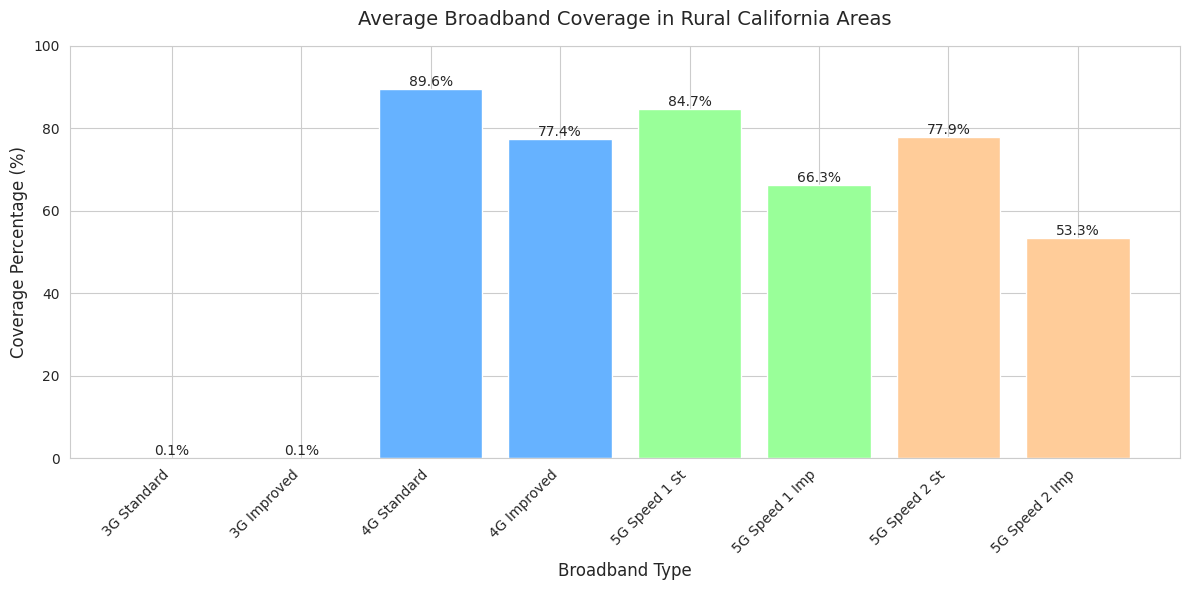

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "/files/SpaceX_Project/data/California_Broadband_Summary.csv"
df = pd.read_csv(file_path)


# Filter for rural areas
rural_df = df[df['area_data_type'] == 'Rural']

# Check if rural areas were found
if rural_df.empty:
    print("No rural areas found in the data.")
else:
    # Calculate the total area of rural places
    total_rural_area = rural_df['total_area'].sum()

    # Calculate the average levels of broadband services
    broadband_columns = [
        'mobilebb_3g_area_st_pct', 'mobilebb_3g_area_iv_pct',
        'mobilebb_4g_area_st_pct', 'mobilebb_4g_area_iv_pct',
        'mobilebb_5g_spd1_area_st_pct', 'mobilebb_5g_spd1_area_iv_pct',
        'mobilebb_5g_spd2_area_st_pct', 'mobilebb_5g_spd2_area_iv_pct'
    ]
    average_broadband_services = rural_df[broadband_columns].mean()

    # Prepare data for plotting
    # Simplify column names for the graph
    labels = [
        '3G Standard', '3G Improved',
        '4G Standard', '4G Improved',
        '5G Speed 1 St', '5G Speed 1 Imp',
        '5G Speed 2 St', '5G Speed 2 Imp'
    ]
    values = average_broadband_services * 100  # Convert to percentage

    # Create bar graph
    plt.figure(figsize=(12, 6))
    bars = plt.bar(labels, values, color=['#FF9999', '#FF9999', '#66B2FF', '#66B2FF', 
                                         '#99FF99', '#99FF99', '#FFCC99', '#FFCC99'])
    
    # Customize the graph
    plt.title('Average Broadband Coverage in Rural California Areas', fontsize=14, pad=15)
    plt.xlabel('Broadband Type', fontsize=12)
    plt.ylabel('Coverage Percentage (%)', fontsize=12)
    plt.ylim(0, 100)  # Set y-axis limit from 0 to 100%
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom')

    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Save the figure as an image
    plt.savefig('/files/SpaceX_Project/png/rural_coverage.png', dpi=300, bbox_inches='tight')
    print("Graph saved as 'rural_coverage.png.png'")

    # Display the graph
    plt.show()


Graph saved as 'avg_broadband_by_type.png'


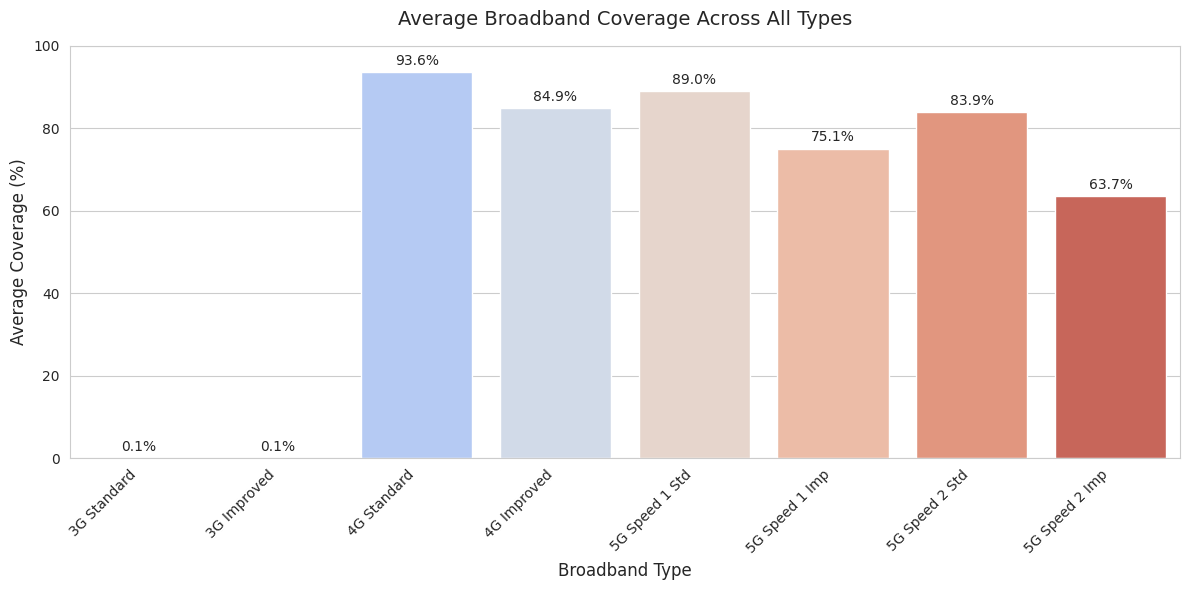

Graph saved as 'coverage_by_area.png'


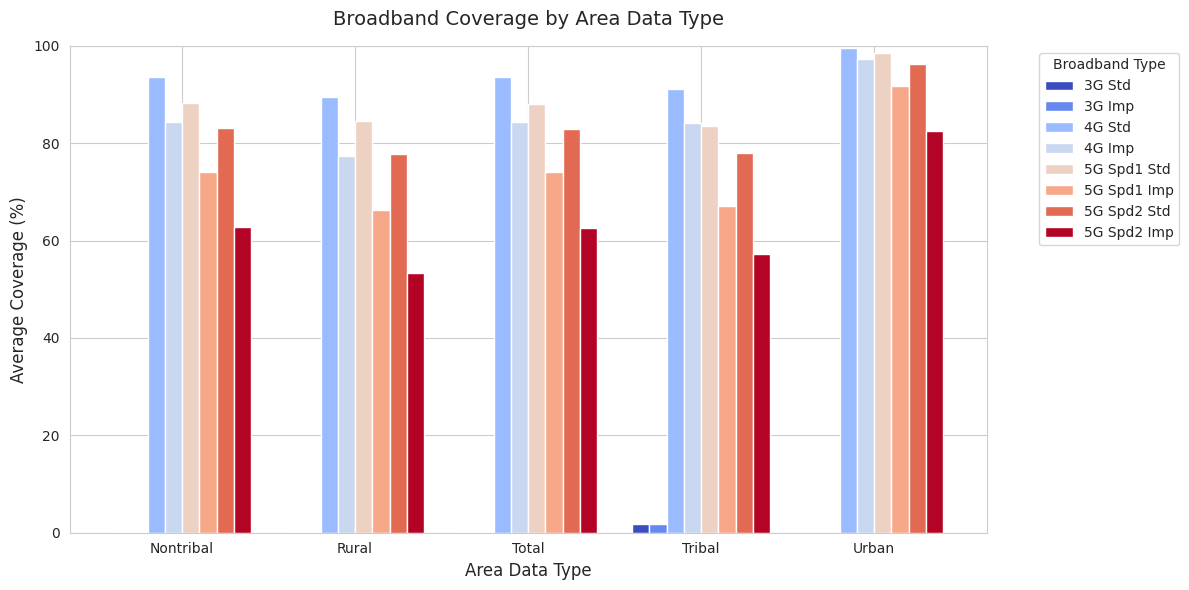

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = "/files/SpaceX_Project/data/California_Broadband_Summary.csv"
df = pd.read_csv(file_path)

# Define all broadband coverage columns
broadband_columns = [
    'mobilebb_3g_area_st_pct', 'mobilebb_3g_area_iv_pct',
    'mobilebb_4g_area_st_pct', 'mobilebb_4g_area_iv_pct',
    'mobilebb_5g_spd1_area_st_pct', 'mobilebb_5g_spd1_area_iv_pct',
    'mobilebb_5g_spd2_area_st_pct', 'mobilebb_5g_spd2_area_iv_pct'
]

# Convert to percentage (assuming original data is in 0-1 range)
df[broadband_columns] = df[broadband_columns] * 100

# Summary statistics for all coverage metrics
coverage_means = df[broadband_columns].mean()

# Group by area_data_type and calculate means for all coverage columns
coverage_by_area_type = df.groupby("area_data_type")[broadband_columns].mean()

# Set seaborn style
sns.set_style("whitegrid")

# 1. Bar chart for overall average coverage across all metrics
plt.figure(figsize=(12, 6))
sns.barplot(x=coverage_means.index, y=coverage_means.values, palette="coolwarm")
plt.xlabel("Broadband Type", fontsize=12)
plt.ylabel("Average Coverage (%)", fontsize=12)
plt.title("Average Broadband Coverage Across All Types", fontsize=14, pad=15)
plt.ylim(0, 100)

# Customize x-axis labels
labels = [
    '3G Standard', '3G Improved',
    '4G Standard', '4G Improved',
    '5G Speed 1 Std', '5G Speed 1 Imp',
    '5G Speed 2 Std', '5G Speed 2 Imp'
]
plt.xticks(range(len(labels)), labels, rotation=45, ha='right')

# Add value labels
for i, v in enumerate(coverage_means.values):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()

# Save the figure as an image
plt.savefig('/files/SpaceX_Project/png/avg_broadband_by_type.png', dpi=300, bbox_inches='tight')
print("Graph saved as 'avg_broadband_by_type.png'")


plt.show()

# 2. Grouped bar chart for coverage by area_data_type
plt.figure(figsize=(12, 6))
coverage_by_area_type.plot(kind="bar", width=0.8, colormap="coolwarm", ax=plt.gca())
plt.xlabel("Area Data Type", fontsize=12)
plt.ylabel("Average Coverage (%)", fontsize=12)
plt.title("Broadband Coverage by Area Data Type", fontsize=14, pad=15)
plt.ylim(0, 100)
plt.xticks(rotation=0)

# Customize legend
plt.legend(
    labels=['3G Std', '3G Imp', '4G Std', '4G Imp', 
            '5G Spd1 Std', '5G Spd1 Imp', '5G Spd2 Std', '5G Spd2 Imp'],
    title="Broadband Type",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()

# Save the figure as an image
plt.savefig('/files/SpaceX_Project/png/coverage_by_area.png', dpi=300, bbox_inches='tight')
print("Graph saved as 'coverage_by_area.png'")

plt.show()

Graph saved as 'broadband_percent_instances.png'


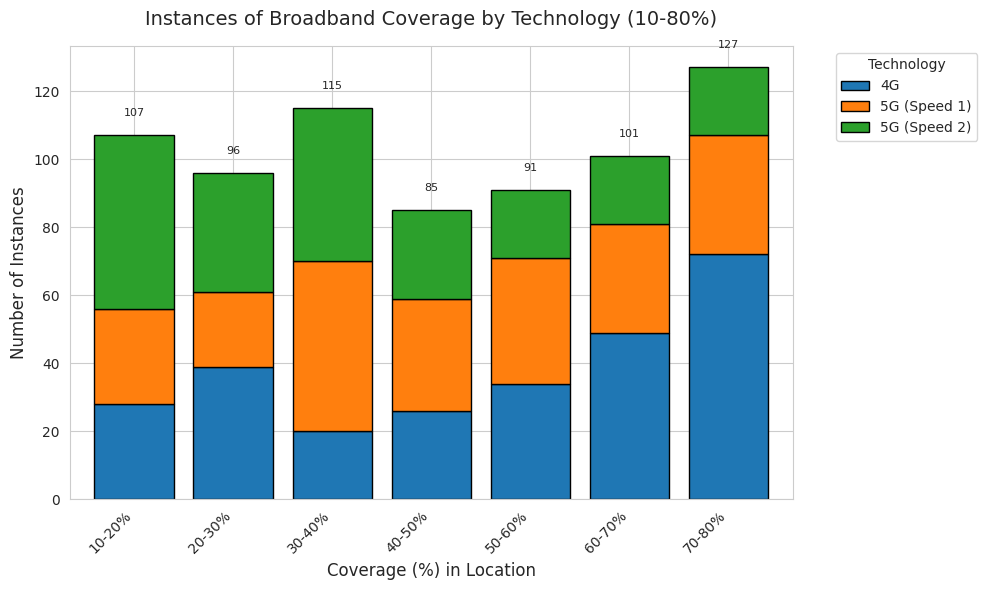

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = "/files/SpaceX_Project/data/California_Broadband_Summary.csv"
df = pd.read_csv(file_path)

# Define coverage columns
coverage_cols = [
    'mobilebb_4g_area_st_pct',
    'mobilebb_5g_spd1_area_st_pct',
    'mobilebb_5g_spd2_area_st_pct'
]

# Convert to percentage if not already (assuming original data is 0-1)
df[coverage_cols] = df[coverage_cols] * 100

# Filter out anything at or above 90% coverage for each technology
df_filtered = df[df[coverage_cols].lt(90).all(axis=1)]

# Set up bins for coverage ranges (10-20%, 20-30%, ..., 70-80%)
bins = np.arange(10, 90, 10)  # Creates [10, 20, 30, ..., 80]
bin_labels = [f"{i}-{i+10}%" for i in range(10, 80, 10)]

# Calculate histograms for each technology
hist_data = {}
for col in coverage_cols:
    hist, _ = np.histogram(df_filtered[col].dropna(), bins=bins)
    hist_data[col] = hist

# Create DataFrame for plotting
hist_df = pd.DataFrame(hist_data, index=bin_labels)
hist_df.columns = ['4G', '5G (Speed 1)', '5G (Speed 2)']

# Create stacked bar chart
plt.figure(figsize=(10, 6))
hist_df.plot(kind='bar', stacked=True, width=0.8, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], edgecolor='black', ax=plt.gca())

# Customize the plot
plt.xlabel("Coverage (%) in Location", fontsize=12)
plt.ylabel("Number of Instances", fontsize=12)
plt.title("Instances of Broadband Coverage by Technology (10-80%)", fontsize=14, pad=15)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Technology", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add total count labels on top of each stack
for i in range(len(hist_df)):
    total = hist_df.iloc[i].sum()
    plt.text(i, total + 5, f'{int(total)}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()

# Save the figure as an image
plt.savefig('/files/SpaceX_Project/png/broadband_percent_instances.png', dpi=300, bbox_inches='tight')
print("Graph saved as 'broadband_percent_instances.png'")

plt.show()
